In [5]:
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4 MB 691 bytes/s a 0:00:01     |██████▍                         | 139.8 MB 70.8 MB/s eta 0:00:08     |█████████████████▍              | 382.0 MB 52.9 MB/s eta 0:00:07
     |████████████████████████████████| 6.6 MB 52.0 MB/s eta 0:00:01


In [6]:
import torch
torch.cuda.is_available()

True

In [8]:
!mkdir data2
!apt-get update
!apt-get install wget
! wget https://voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com/cv-corpus-4-2019-12-10/es.tar.gz -P data2
# !rm data2/*.tar.gz*

mkdir: cannot create directory ‘data2’: File exists
--2020-06-26 11:02:53--  https://voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com/cv-corpus-4-2019-12-10/es.tar.gz
Resolving voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com (voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com)... 52.218.234.227
Connecting to voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com (voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com)|52.218.234.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6226191576 (5.8G) [application/x-tar]
Saving to: ‘data2/es.tar.gz’

es.tar.gz           100%[===================>]   5.80G  46.7MB/s    in 3m 40s  

2020-06-26 11:06:32 (27.0 MB/s) - ‘data2/es.tar.gz’ saved [6226191576/6226191576]



In [9]:
!tar -C data2/ -zxvf data2/es.tar.gz

clips/
dev.tsv
invalidated.tsv
other.tsv
test.tsv
train.tsv
validated.tsv
clips/common_voice_es_18306544.mp3
clips/common_voice_es_18306545.mp3
clips/common_voice_es_18306546.mp3
clips/common_voice_es_18306547.mp3
clips/common_voice_es_18306548.mp3
clips/common_voice_es_18306564.mp3
clips/common_voice_es_18306565.mp3
clips/common_voice_es_18306566.mp3
clips/common_voice_es_18306567.mp3
clips/common_voice_es_18306568.mp3
clips/common_voice_es_18306579.mp3
clips/common_voice_es_18306580.mp3
clips/common_voice_es_18306581.mp3
clips/common_voice_es_18306582.mp3
clips/common_voice_es_18306583.mp3
clips/common_voice_es_18306589.mp3
clips/common_voice_es_18306590.mp3
clips/common_voice_es_18306591.mp3
clips/common_voice_es_18306592.mp3
clips/common_voice_es_18306593.mp3
clips/common_voice_es_18306594.mp3
clips/common_voice_es_18306595.mp3
clips/common_voice_es_18306596.mp3
clips/common_voice_es_18306597.mp3
clips/common_voice_es_18306598.mp3
clips/common_voice_es_18306604.mp3
clips/common_voi

In [10]:
!du -sh data2/clips/

6.3G	data2/clips/


In [11]:
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().system('pip install snakeviz')
get_ipython().run_line_magic('load_ext', 'snakeviz')

     |████████████████████████████████| 282 kB 4.7 MB/s eta 0:00:01


In [12]:
get_ipython().system('pip install git+https://github.com/mogwai/fastai_audio@0.1')

  Cloning https://github.com/mogwai/fastai_audio (to revision 0.1) to /tmp/pip-req-build-h5pauemh
  Running command git clone -q https://github.com/mogwai/fastai_audio /tmp/pip-req-build-h5pauemh
  Running command git checkout -q 3730194a0ed14e142416f60e71effa6e28058b60
     |████████████████████████████████| 239 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 30.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 55.9 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 31 kB/s s eta 0:00:01
     |████████████████████████████████| 10.0 MB 59.8 MB/s eta 0:00:01
     |████████████████████████████████| 323 kB 49.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 56.2 MB/s eta 0:00:01
     |████████████████████████████████| 118 kB 48.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 50.9 MB/s eta 0:00:01
     |████████████████████████████████| 185 kB 62.0 MB/s eta 0:00:01
  Created wheel for fastai-audio: filena

In [13]:
!sudo apt update
!sudo apt-get install libsndfile1-dev -y
!pip install numba==0.43.0
!pip install sndfile
from audio import *

Ign:1 http://deb.debian.org/debian stretch InRelease
Get:2 http://security.debian.org stretch/updates InRelease [94.3 kB]
Get:3 http://deb.debian.org/debian stretch-updates InRelease [93.6 kB]         
Get:5 http://deb.debian.org/debian stretch-backports InRelease [91.8 kB]       
Hit:6 http://deb.debian.org/debian stretch Release 
Get:7 https://nvidia.github.io/libnvidia-container/debian9/amd64  InRelease [1,141 B]
Get:8 https://nvidia.github.io/nvidia-container-runtime/debian9/amd64  InRelease [1,138 B]
Hit:9 http://packages.cloud.google.com/apt gcsfuse-stretch InRelease           
Get:10 https://nvidia.github.io/nvidia-docker/debian9/amd64  InRelease [1,131 B]
Get:11 https://download.docker.com/linux/debian stretch InRelease [44.8 kB]    
Get:12 http://packages.cloud.google.com/apt cloud-sdk-stretch InRelease [6,386 B]0m
Get:4 https://packages.cloud.google.com/apt kubernetes-xenial InRelease [8,993 B]
Get:13 http://packages.cloud.google.com/apt google-compute-engine-stretch-stable I

In [14]:
torch.cuda.is_available()
# torch.cuda.current_device()
# torch.cuda.set_device(0)

True

In [15]:
torch.cuda.current_device()
# torch.cuda.get_device_name(0)
torch.cuda.set_device(0)

In [16]:
sg_cfg= SpectrogramConfig(hop_length=80, n_mels=80, n_fft=480, top_db=80, f_min=20.0, f_max=16000)
config_split= AudioConfig(resample_to = 8000, remove_silence="all", silence_padding=200, silence_threshold=20, sg_cfg=sg_cfg, duration=5000, pad_mode='zeros-after')

In [17]:
train_df = pd.read_csv(Path("./data2/train.tsv"),sep="\t")

In [18]:
class ImageAudioList(AudioList):
    _bunch = ImageDataBunch
    context = 11
    def reconstruct(self, x): return Image(torch.stack([i[:,self.context+1] for i in x],dim=1).unsqueeze(0))
    
    def show_xys(self, xs, ys)->None:
        items = [[x,y] for i, (x,y) in enumerate(zip(xs,ys))]
        for item in items:
            display(*item)

In [19]:
class SentenceCharList(ItemList):
    
    itoc = list("abcdefghijklmnopqrstuvwxyzáéíñóúü '")+['']
    ctoi = defaultdict(lambda: 35)
    def __init__(self, items, path, **kwargs):
        super().__init__(items, **kwargs)
        for i,char in enumerate(self.itoc):
            self.ctoi[char]=i
        
    def get(self,i):
        return F.pad(torch.tensor([self.ctoi[j] for j in self.items[i].lower()]), pad=(0,200), mode='constant', value=35)[:100]

    def reconstruct(self, t:Tensor):
        return "".join((self.itoc[c] for c in t[0]))

In [20]:

#My solution to having to look through training files to make sure they are in training and not validation. 
train_file = defaultdict(bool)
for i in train_df.path:
    train_file[i] = True

In [21]:
def _slice_context(b, context):
    x,y = b
    input_lengths = []
    for input_line in x.sum(dim=2).flip(2,):
        count=0
        total_length = input_line[0].shape[0]
        for elem in input_line[0]:
            if elem != 0.0000:
                break;
            count+=1
        input_lengths.append(total_length-count)
    input_lengths = torch.tensor(input_lengths)
    x = F.pad(x, pad=(context,context))
    x = torch.stack([x[:,:,:,i:i+(context*2+1)] for i in range(x.shape[-1]-(context*2))],dim=2).squeeze()
    return x,(y,input_lengths)

In [ ]:
# get_ipython().system('conda activate pytorch-conda -y')
# get_ipython().system('conda install -c conda-forge sox -y ')
# get_ipython().system('conda install -c pytorch torchaudio -y')
# get_ipython().system('python -c "import torchaudio"')

In [22]:
data = (ImageAudioList.from_folder("data2/clips", config=config_split)
#        .use_partial_data(0.05, seed=42)
        .filter_by_func(lambda x: train_file[x.name])
        .split_by_rand_pct(0.25, seed=42)
        .label_from_func(lambda x: train_df[train_df.path==str(x).split("/")[-1]]["sentence"].iloc[0], label_cls=SentenceCharList)
        .databunch(bs=32)
        .normalize()
       )

Filtered out 2 empty files
Preprocessing: Resampling to 8000


Preprocessing: Removing Silence


Preprocessing: Resampling to 8000


Preprocessing: Removing Silence


In [23]:
data.add_tfm(partial(_slice_context, context=11))


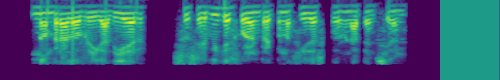

'nombrado brigadier sus servicios fueron reconocidos con una pensión'

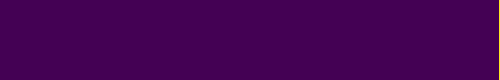

'en la actualidad es una localidad residencial dotada de una notable infraestructura'

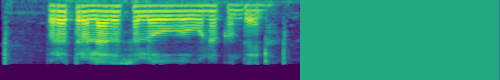

'por otro lado solo hubo una condena'

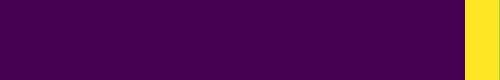

'representa a la ciudad de clorinda en la provincia de formosa'

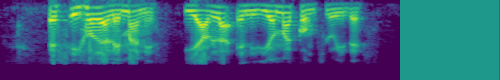

'es hijo de alemanes y habla el idioma con fluidez'

In [24]:
data.show_batch()


In [33]:
class DeepSpeech(nn.Module):
    def __init__(self, context=5, bs=64):
        super(DeepSpeech, self).__init__()
        self.bs = bs
        self.context = context
        self.flatten = nn.Flatten()#lambda x: torch.reshape(x,(-1,1,2432))
        self.h1 = nn.Linear(80*2*self.context+80,2048)
        self.h2 = nn.Linear(2048,2048)
        self.h3 = nn.Linear(2048,2048)
        #self.h4 = nn.LSTM(2048,2048,bidirectional=True,batch_first=True)
        self.h4 = nn.RNN(2048,2048, nonlinearity="relu",bidirectional=True)
        self.h5 = nn.Linear(2048,36) #ct ∈ {a,b,c, . . . , z, space, apostrophe, blank}
        self.softmax = nn.LogSoftmax(dim=2)

    def forward(self, x):
        x = x.view(x.shape[0],-1,80*2*self.context+80)
        x = self.h1(x).clamp(min=0, max=20)
        x = self.h2(x).clamp(min=0, max=20)
        x = self.h3(x).clamp(min=0, max=20)
        x,h = self.h4(x)
        x = x.view(-1,500,2,2048)
        x = x.sum(dim=2)
        x = self.h5(x).clamp(min=0, max=20)
        x = self.softmax(x)
        x = x.permute(1,0,2)
        return x

In [34]:
# def ctc_loss(input, target, bs=64, blank=28):
#     r"""Loss function that makes CTC Loss easier to use especially for putting into a fastai Learner"""
#     i_length = torch.tensor([sum([1 for i in t.sum(1) if i != 0]) for t in input])
#     input = input.permute(1,0,2).detach().requires_grad_()
#     ctc = nn.CTCLoss(blank=blank, zero_infinity=True, reduction="sum")
#     t_length = torch.tensor([sum([1 for i in t if i != blank])for t in target])
#     ret = ctc(input, target, input_lengths=i_length, target_lengths=t_length)#torch.tensor([100]*input.size(1)))
#     return ret

In [35]:
def calculate_sizes(x):
    return x.shape[0] - (x.argmax(dim=2)==35).sum(axis=0)
#     input_lengths = []
#     for input_line in x.argmax(dim=2).flip(1,)==x.argmax(dim=2).flip(1,)[:,0][:,None]:
#         count=0
#         total_length = input_line.shape[0]
#         for elem in input_line:
#             if not elem:
#                 break;
#             count+=1
#         input_lengths.append(total_length-count)
    
#     return torch.tensor(input_lengths)

In [36]:
def ctc_loss(log_loss, target, i_length, bs=64, blank=35):
    r"""Loss function that makes CTC Loss easier to use especially for putting into a fastai Learner"""
    #i_length = torch.tensor([sum([1 for i in t.sum(1) if i != 0]) for t in input])
    i_length = i_length.long()
    ctc = nn.CTCLoss(blank=blank, zero_infinity=True, reduction="sum")
    t_length = target.shape[-1]-(target==35).sum(dim=1).long()
    target = target.long()
    #t_length = torch.tensor([sum([1 for i in t if i != blank])for t in target])
    ret = ctc(log_loss, target, input_lengths=i_length, target_lengths=t_length)
    #ret = F.ctc_loss(log_loss, target, input_lengths=i_length, target_lengths=t_length, blank=blank, reduction="sum", zero_infinity=True)
    return ret

In [37]:
model = DeepSpeech(context=data.x.context, bs=data.batch_size)


In [38]:
apply_init(model, nn.init.kaiming_normal_)


In [39]:
learn = Learner(data, model, loss_func=partial(ctc_loss,bs=data.batch_size))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


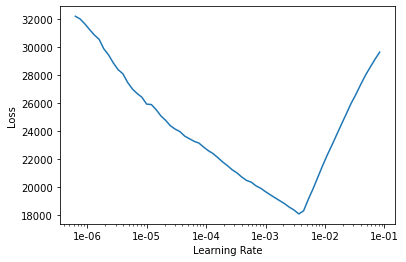

In [40]:
learn.lr_find()
learn.recorder.plot()


In [51]:
learn.fit_one_cycle(5,1e-3)


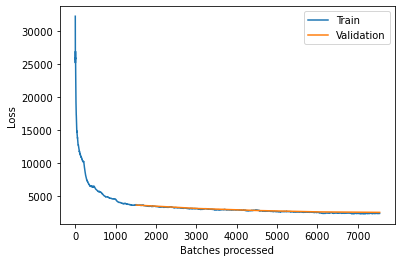

In [44]:
learn.recorder.plot_losses()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


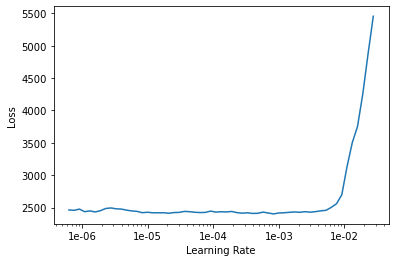

In [52]:
learn.lr_find();learn.recorder.plot()


In [53]:
learn.fit_one_cycle(2,1e-3)


In [54]:
learn.save("secondDeepSpeechRun", return_path=True)


PosixPath('data2/clips/models/secondDeepSpeechRun.pth')

In [49]:
!ls data2/clips/models

ls: cannot access 'data2/clips/models': No such file or directory


In [47]:
!mkdir models

In [55]:
!mv data2/clips/models/secondDeepSpeechRun.pth models 

In [56]:
!rm data2/clips/models/secondDeepSpeechRun.pth

rm: cannot remove 'data2/clips/models/secondDeepSpeechRun.pth': No such file or directory


In [ ]:
rmdir data2/clips/models/